# Various optimization Algos

In [3]:
%run ~/.jupyter/config.ipy

In [7]:
from plot import *

import autograd.numpy as np
from autograd import grad, jacobian, hessian

from line_search import get_line_length

assert "autograd" in np.__file__ # Need to make sure that we get the correct numpy - my config/other imports might import the default one.

# Steepest Descent

### For a quadratic

In [16]:
def qaudratic(h, g, x):
    dims = x.shape[0]
    assert x.shape() == (dims, 1)
    assert g.shape() == (dims, 1)
    assert h.shape() == (dims, dims)
    
    return np.matmul(x.T, np.matmul(h, x)) + np.matmul(g.T, x)

### For some function

$$
f(x_1, x_2) = (cx_1 − 2)^4 + x_2^2(cx_1 − 2)^2 + (x_2 + 1)^2
$$

100


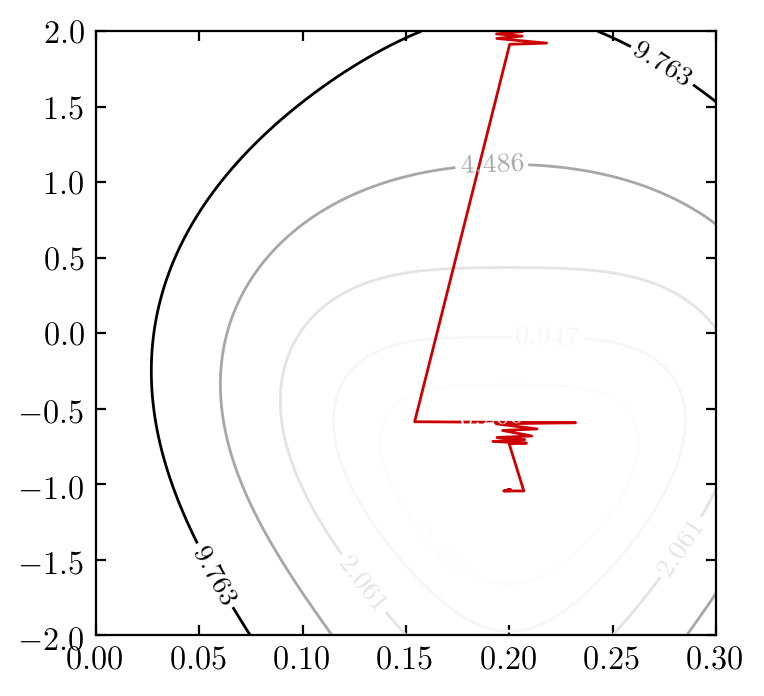

In [85]:
c = 10
f = lambda x: (c*x[0] - 2)**4 + x[1]**2 * (c*x[0] - 2)**2 + (x[1] + 1)**2
grad_f = grad(f)

ax = plot_func(f, lim=[0, 0.3, -2, 2], typ="contour")


x = np.array([3., 3.]) # Why not

all_x = []
for i in range(100):
    all_x.append(x)
    direction = -grad_f(x)
    rate = np.linalg.norm(direction)
    # Roughly floating point accuracy
    if rate < 1e-7:
        break
    direction /= rate    
    a = get_line_length(f, grad_f, x, direction, a_max=10)
    x = x + direction * a
all_x = np.array(all_x)
print(len(all_x))
ax.plot(all_x[:,0], all_x[:,1])

12


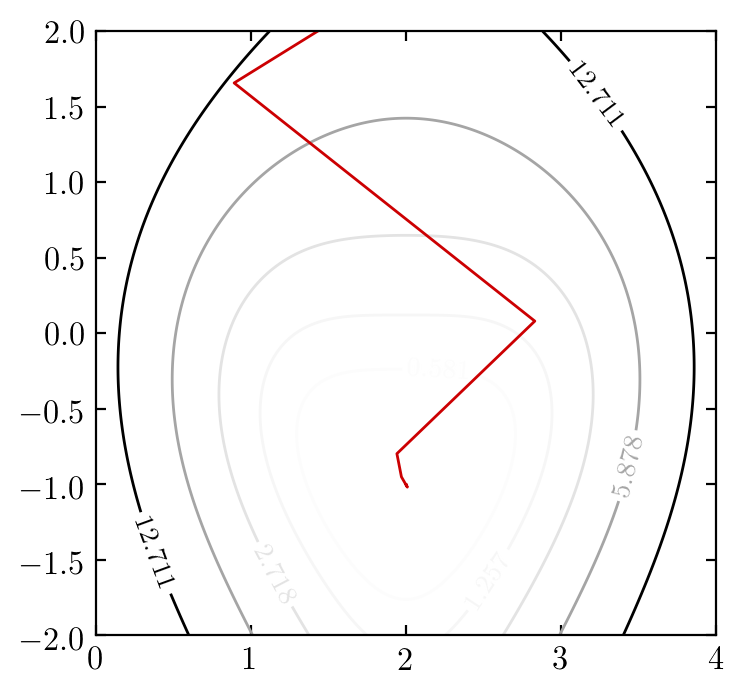

In [84]:
c = 1
f = lambda x: (c*x[0] - 2)**4 + x[1]**2 * (c*x[0] - 2)**2 + (x[1] + 1)**2
grad_f = grad(f)

ax = plot_func(f, lim=[0, 4, -2, 2], typ="contour")


x = np.array([3., 3.]) # Why not

all_x = []
while True:
    all_x.append(x)
    direction = -grad_f(x)
    rate = np.linalg.norm(direction)
    # Roughly floating point accuracy
    if rate < 1e-7:
        break
    direction /= rate    
    a = get_line_length(f, grad_f, x, direction, a_max=10)
    x = x + direction * a
all_x = np.array(all_x)
print(len(all_x))
ax.plot(all_x[:,0], all_x[:,1])

# Line search step length

8.0 [4. 4.]
> /home/christopher/code/learning/statistics/optimization/line_search.py(11)get_line_length()
-> v0 = f(x0)
(Pdb) exit


BdbQuit: 

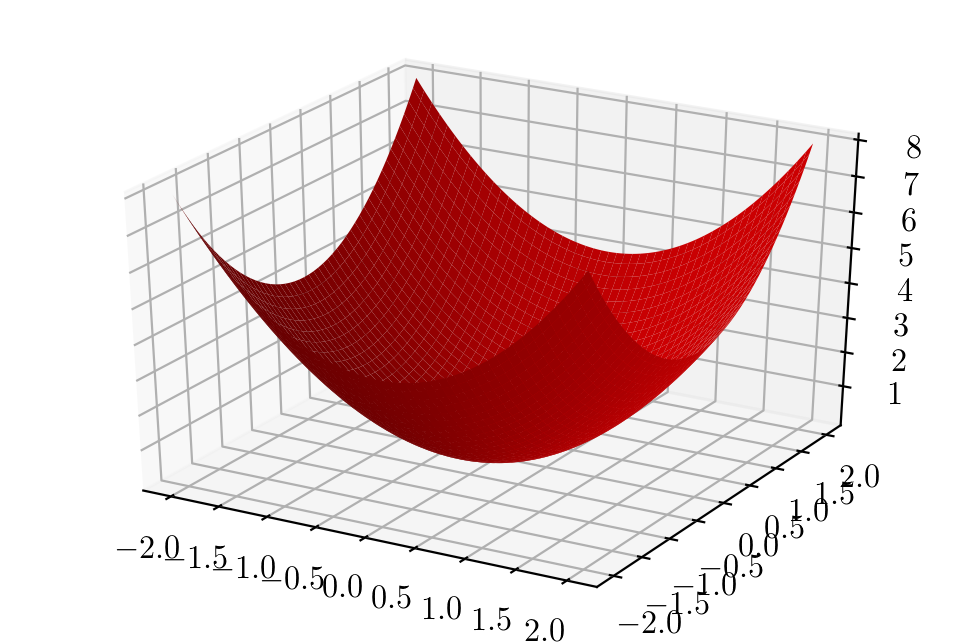

In [14]:
f = lambda x: x[0]**2 + x[1]**2
grad_f = grad(f)

ax = plot_func(f, lim=[-2, 2, -2, 2], typ="surface")

x0 = np.array([2, 2], dtype=np.float32)

print(f(x0), grad_f(x0))
get_line_length(f, grad_f, x0, -x0, 10)